# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | wenling
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | lakatoro
Processing Record 8 of Set 1 | newman
Processing Record 9 of Set 1 | fale old settlement
Processing Record 10 of Set 1 | nar'yan-mar
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | es castell
Processing Record 13 of Set 1 | osakarovka
Processing Record 14 of Set 1 | kalmunai
Processing Record 15 of Set 1 | belyy yar
Processing Record 16 of Set 1 | flying fish cove
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | shah

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,73,100,0.89,NZ,1722820516
1,dudinka,69.4058,86.1778,10.22,56,0,9.22,RU,1722820310
2,udachny,66.4167,112.4000,19.88,44,100,4.81,RU,1722820455
3,albany,42.6001,-73.9662,24.24,77,0,0.45,US,1722820066
4,wenling,28.3669,121.3600,29.63,76,53,2.17,CN,1722820394


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,73,100,0.89,NZ,1722820516
1,dudinka,69.4058,86.1778,10.22,56,0,9.22,RU,1722820310
2,udachny,66.4167,112.4000,19.88,44,100,4.81,RU,1722820455
3,albany,42.6001,-73.9662,24.24,77,0,0.45,US,1722820066
4,wenling,28.3669,121.3600,29.63,76,53,2.17,CN,1722820394


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

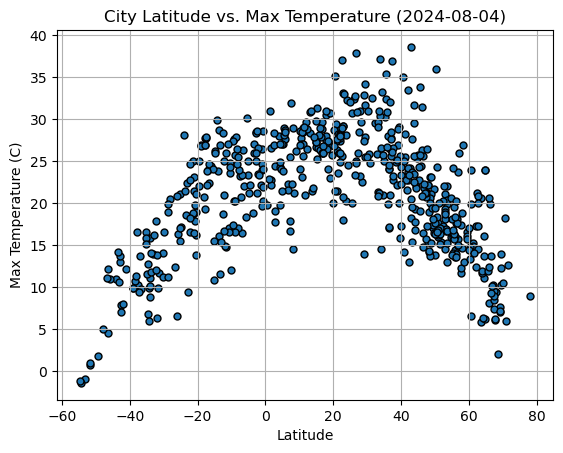

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", s=25, edgecolor='k', grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-08-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

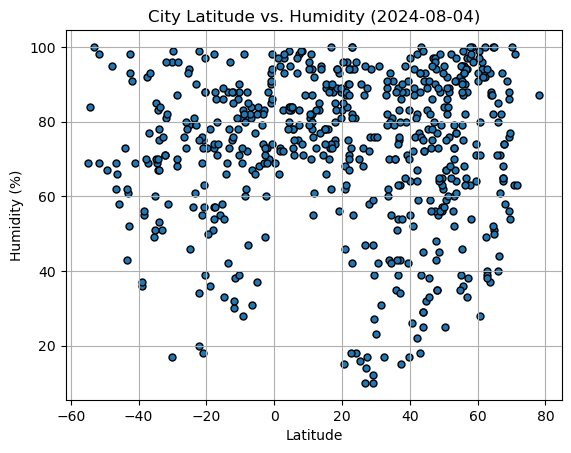

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", s=25, edgecolor='k', grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

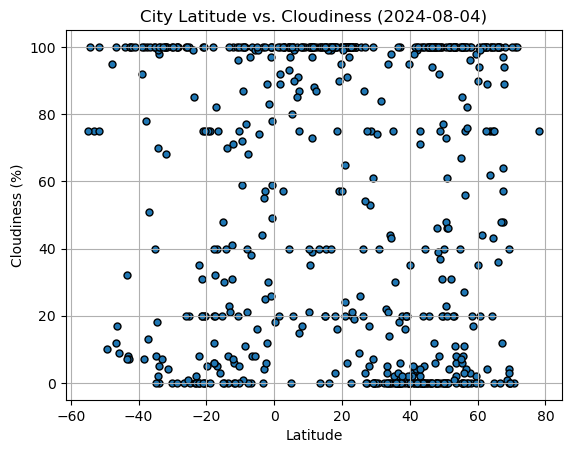

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", s=25, edgecolor='k', grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

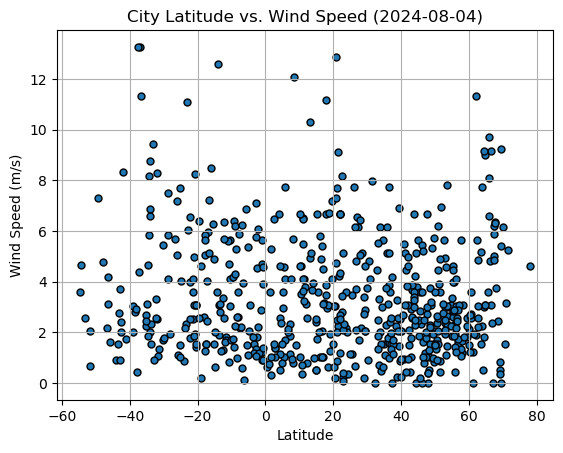

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", s=25, edgecolor='k', grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_value = slope * x_values + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.plot(x_values, regress_value, "-r")
    plt.scatter(x_values, y_values)
    plt.legend({line_eq}, loc='lower right')
  
    
    print(f"The r^2-value is: {rvalue}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dudinka,69.4058,86.1778,10.22,56,0,9.22,RU,1722820310
2,udachny,66.4167,112.4000,19.88,44,100,4.81,RU,1722820455
3,albany,42.6001,-73.9662,24.24,77,0,0.45,US,1722820066
4,wenling,28.3669,121.3600,29.63,76,53,2.17,CN,1722820394
7,newman,37.3138,-121.0208,36.99,15,2,4.18,US,1722820202


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,73,100,0.89,NZ,1722820516
5,edinburgh of the seven seas,-37.0676,-12.3116,13.68,77,51,13.26,SH,1722820521
6,lakatoro,-16.0999,167.4164,24.40,55,3,8.49,VU,1722820511
8,fale old settlement,-9.3852,-171.2468,27.68,81,100,6.40,TK,1722820524
10,puerto natales,-51.7236,-72.4875,0.80,98,100,0.65,CL,1722820527


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6587913758798323


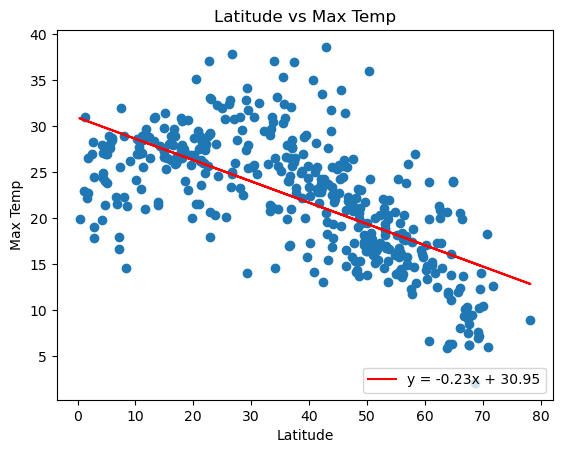

In [37]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r^2-value is: 0.7898127869879926


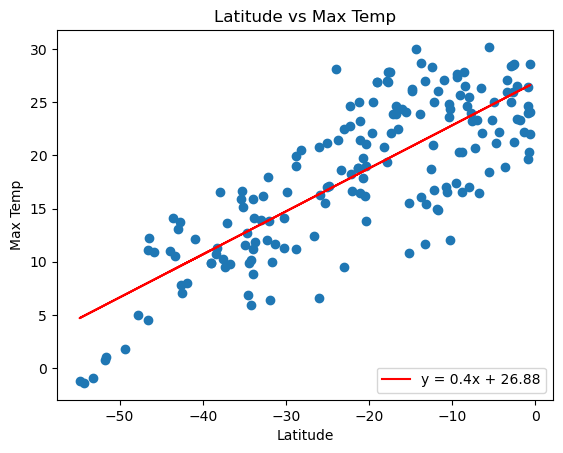

In [38]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** There is a rather strong correlation, positive in the southern hemisphere and negative in the northern hemisphere, between the max temperature and latitude. The closer the latitude to zero, the higher the max temperature, and the further away, the lower the max temperature. The linear regression equations would be good at predicting the projected max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.09098772894102297


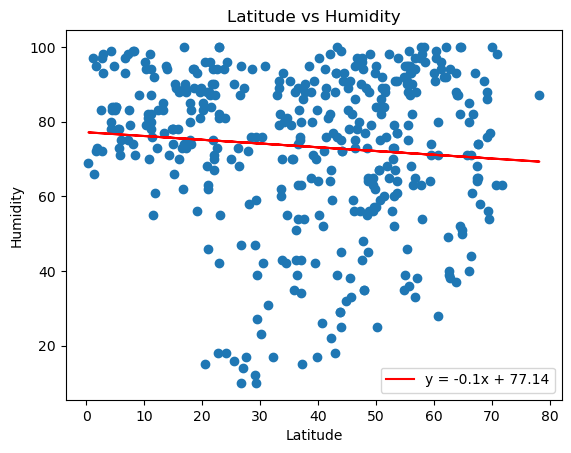

In [42]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r^2-value is: 0.036927360324643034


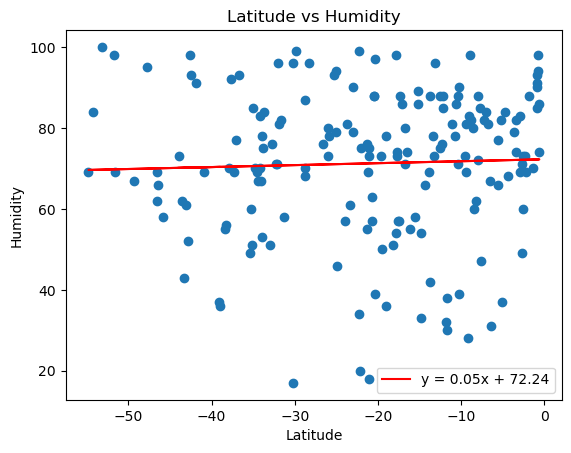

In [43]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** There appears to be little to no correlation between latitude and humidity in either of the hemispheres. The R-squared value is close to zero in both cases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.1975771448284138


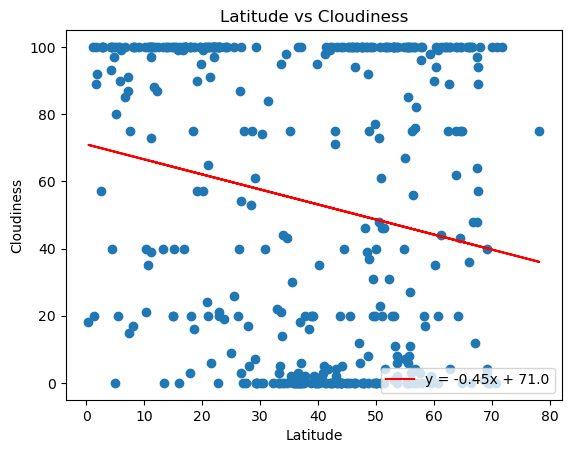

In [44]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r^2-value is: -0.09429776177597461


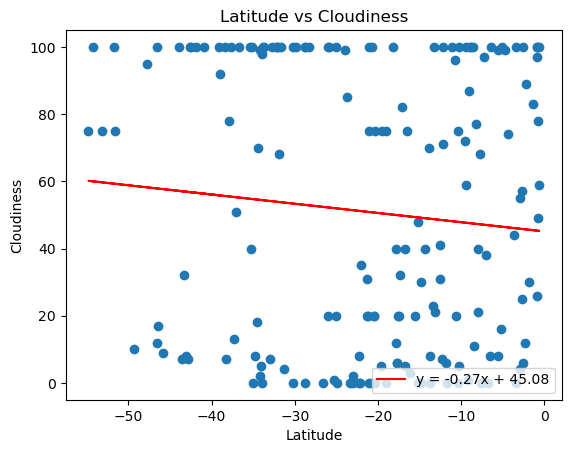

In [45]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** In the southern hemisphere, there appears to be zero correlation, as the R-squared value is close to zero; the northern hemisphere appears to have a small, negative correlation with the R-squared value of -0.1976. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.008209906810011547


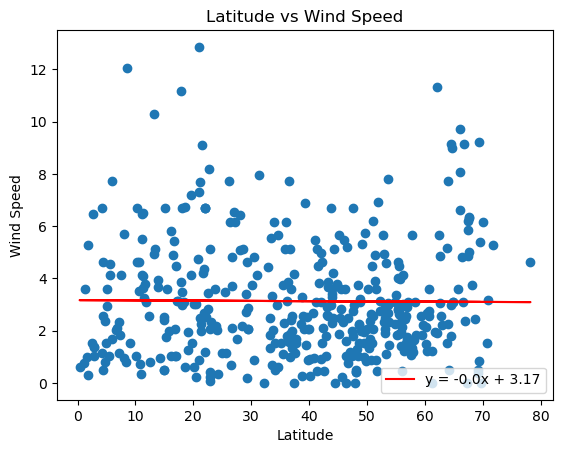

In [46]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r^2-value is: -0.09533330303635955


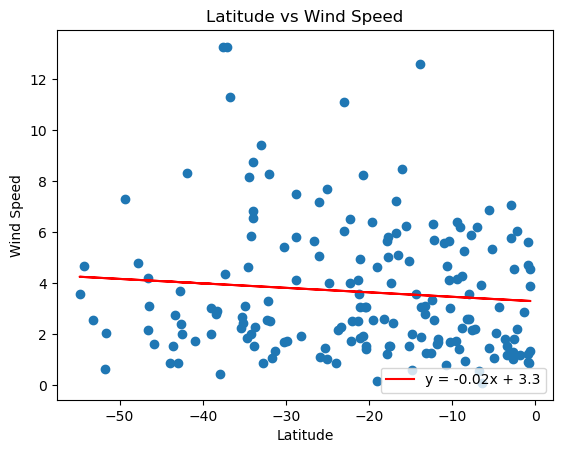

In [47]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** There appears to be no correlation between latitude and wind speed in either hemisphere, as both R-squared values are close to zero.